# Imports and general settings

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import itertools
import nltk
from nltk.corpus import stopwords

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('datos.csv')

In [4]:
df.loc[df['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'] == 'zona_sur'].replace('zona_sur', np.nan, inplace=True)

# df[df['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'] == 'zona_sur']


/Users/lambda/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


# Data Munging

In [5]:
# There are two columns that incorrectly label VIOLENCIA_DE_GENERO as 'no' 
# when positive labels in columns that register types of violence seem to indicate
# that there is in fact violence present.
# We include them in our analysis

# df.loc[[1468, 1500, 2865, 2866], 'VIOLENCIA_DE_GENERO'] = 'si'

In [6]:
df = df[df['VIOLENCIA_DE_GENERO'] == 'si'] # Select all the gender violence cases

In [7]:
# cast Violence columns into bool type

df['VIOLENCIA_DE_GENERO'] = df['VIOLENCIA_DE_GENERO'].map({'si':True, 'no':False, 's/d':np.nan})
df['VIOLENCIA_DE_GENERO'] = df['VIOLENCIA_DE_GENERO'].astype(bool)

df['V_FISICA'] = df['V_FISICA'].map({'si':True, 'no':False, 's/d':np.nan})
df['V_FISICA'] = df['V_FISICA'].astype(bool)

df['V_PSIC'] = df['V_PSIC'].map({'si':True, 'no':False, 's/d':np.nan})
df['V_PSIC'] = df['V_PSIC'].astype(bool)

df['V_ECON'] = df['V_ECON'].map({'si':True, 'no':False, 's/d':np.nan})
df['V_ECON'] = df['V_ECON'].astype(bool)

df['V_SEX'] = df['V_SEX'].map({'si':True, 'no':False, 's/d':np.nan})
df['V_SEX'] = df['V_SEX'].astype(bool)

df['V_SIMB'] = df['V_SIMB'].map({'si':True, 'no':False, 's/d':np.nan})
df['V_SIMB'] = df['V_SIMB'].astype(bool)

df['V_SOC'] = df['V_SOC'].map({'si':True, 'no':False, 's/d':np.nan})
df['V_SOC'] = df['V_SOC'].astype(bool)

df['V_AMB'] = df['V_AMB'].map({'si':True, 'no':False, 's/d':np.nan})
df['V_AMB'] = df['V_AMB'].astype(bool)


In [8]:
violencias = ['V_FISICA', 'V_PSIC', 'V_ECON', 'V_SEX', 'V_SIMB']
df[violencias]

,V_FISICA,V_PSIC,V_ECON,V_SEX,V_SIMB
1,False,True,False,False,True
2,True,True,True,False,True
4,False,True,True,False,True
9,True,True,False,False,True
20,False,False,True,False,False
...,...,...,...,...,...
3618,True,True,True,True,True
3619,False,True,False,False,True
3620,True,True,False,False,True
3624,False,True,False,False,True


In [9]:
# Datetime columns

df["FECHA_RESOLUCION"] = pd.to_datetime(df["FECHA_RESOLUCION"], format="%d_%m_%Y", errors="coerce") # casting data to datetime type


In [10]:
df["FECHA_DEL_HECHO"] = pd.to_datetime(df["FECHA_DEL_HECHO"], format="%d_%m_%Y", errors="coerce") # casting data to datetime type

In [11]:
df = df.set_index(pd.DatetimeIndex(data=df['FECHA_RESOLUCION'], yearfirst=True))

# Cleaning

In [12]:
# Column name has a line break at the end which makes it difficult to select

df.columns.values[32] = 'LUGAR_DEL_HECHO'

In [13]:
# To do

df[df['ZONA_DEL_HECHO'] == 'mariano acosta 10074']

,N,NRO_REGISTRO,FECHA_RESOLUCION,FIRMA,MATERIA,ART_INFRINGIDO,CODIGO_O_LEY,CONDUCTA,CONDUCTA_DESCRIPCION,VIOLENCIA_DE_GENERO,...,LINK_CAMARA.1,QUEJA_Y_RECURRENTE,DECISION_DE_ADMISIBILIDAD_TSJ,N_REGISTRO_Y_TOMO_TSJ,LINK_TSJ,DECISION_DE_FONDO_TSJ,N_REGISTRO_Y_TOMO_TSJ.1,LINK_TSJ.1,RECURSO_EXTRAORDINARIO_Y_RECURRENTE,DECISION_CSJN
FECHA_RESOLUCION,,,,,,,,,,,,,,,,,,,,,
2020-07-15,2753.0,2862,2020-07-15,Pablo_Casas,penal,92,codigo_penal_de_la_nacion,lesiones,agravado,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# To do

df[df['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'] == 'zona_sur']

,N,NRO_REGISTRO,FECHA_RESOLUCION,FIRMA,MATERIA,ART_INFRINGIDO,CODIGO_O_LEY,CONDUCTA,CONDUCTA_DESCRIPCION,VIOLENCIA_DE_GENERO,...,LINK_CAMARA.1,QUEJA_Y_RECURRENTE,DECISION_DE_ADMISIBILIDAD_TSJ,N_REGISTRO_Y_TOMO_TSJ,LINK_TSJ,DECISION_DE_FONDO_TSJ,N_REGISTRO_Y_TOMO_TSJ.1,LINK_TSJ.1,RECURSO_EXTRAORDINARIO_Y_RECURRENTE,DECISION_CSJN
FECHA_RESOLUCION,,,,,,,,,,,,,,,,,,,,,
2020-06-24,2730.0,2839,2020-06-24,Pablo_Casas,penal,149bis,codigo_penal_de_la_nacion,amenazas,agravadas_por_uso_de_armas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# For reference

In [15]:
i = 0
for index, elem in df.dtypes.items():
    print(i, '.', index,'........', elem)
    i += 1

0 . N ........ float64
1 . NRO_REGISTRO ........ object
2 . FECHA_RESOLUCION ........ datetime64[ns]
3 . FIRMA ........ object
4 . MATERIA ........ object
5 . ART_INFRINGIDO ........ object
6 . CODIGO_O_LEY ........ object
7 . CONDUCTA ........ object
8 . CONDUCTA_DESCRIPCION ........ object
9 . VIOLENCIA_DE_GENERO ........ bool
10 . V_FISICA ........ bool
11 . V_PSIC ........ bool
12 . V_ECON ........ bool
13 . V_SEX ........ bool
14 . V_SOC ........ bool
15 . V_AMB ........ bool
16 . V_SIMB ........ bool
17 . MODALIDAD_DE_LA_VIOLENCIA ........ object
18 . FRASES_AGRESION ........ object
19 . GENERO_ACUSADO/A ........ object
20 . NACIONALIDAD_ACUSADO/A ........ object
21 . EDAD_ACUSADO/A AL MOMENTO DEL HECHO ........ object
22 . NIVEL_INSTRUCCION_ACUSADO/A ........ object
23 . GENERO_DENUNCIANTE ........ object
24 . NACIONALIDAD_DENUNCIANTE ........ object
25 . EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO ........ object
26 . NIVEL_INSTRUCCION_DENUNCIANTE ........ object
27 . FRECUENCIA_EPIS

# Plotting

## Resoluciones por año

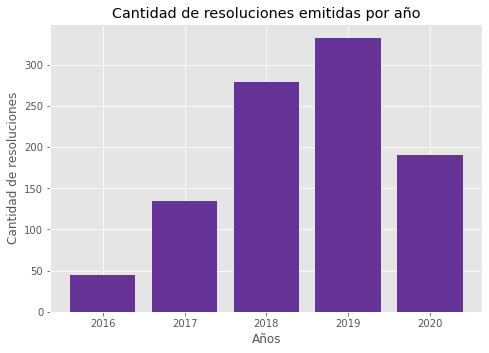

In [36]:
years = df.FECHA_RESOLUCION.dt.year.dropna().unique().astype(int) # 2016, 2017, 2018, 2019
resolutions = df.FECHA_RESOLUCION.dt.year.dropna().value_counts().sort_index()
x_pos = np.arange(len(years))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_pos, resolutions, color='rebeccapurple')

ax.set_xlabel("Años")
ax.set_ylabel("Cantidad de resoluciones")
ax.set_title("Cantidad de resoluciones emitidas por año")

ax.set_xticks(x_pos)
ax.set_xticklabels(years)

plt.show()

## Types of violence per year

In [17]:
types_of_violence_by_year = df[violencias].groupby(df.FECHA_RESOLUCION.dt.year).sum()

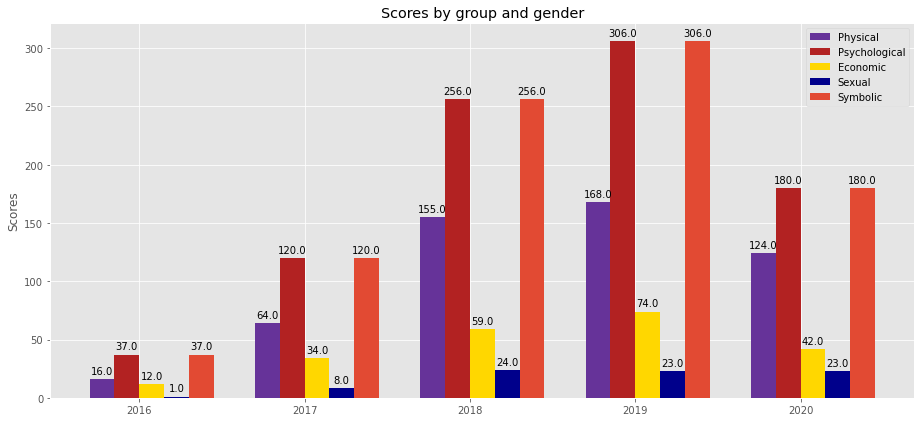

In [70]:
labels = [2016, 2017, 2018, 2019, 2020]
physical_violence = types_of_violence_by_year['V_FISICA']
psychological_violence = types_of_violence_by_year['V_PSIC']
economic_violence = types_of_violence_by_year['V_ECON']
sexual_violence = types_of_violence_by_year['V_SEX']
symbolic_violence = types_of_violence_by_year['V_SIMB']

violence_columns = [physical_violence, psychological_violence, economic_violence, 
                    sexual_violence, symbolic_violence]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig = plt.figure()
ax = fig.add_axes([0,0,2,1.3])

rects1 = ax.bar(x - 2 * width, physical_violence, width, label='Physical', align='edge', color='rebeccapurple')
rects2 = ax.bar(x - width, psychological_violence, width, label='Psychological', align='edge', color='firebrick')
rects3 = ax.bar(x, economic_violence, width, label='Economic', align='edge', color='gold')
rects4 = ax.bar(x + width, sexual_violence, width, label='Sexual', align='edge', color='darkblue')
rects5 = ax.bar(x + 2 * width, symbolic_violence, width, label='Symbolic', align='edge')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()

Notar la correspondiencia 1 a 1 entre violencia psicológica y simbólica

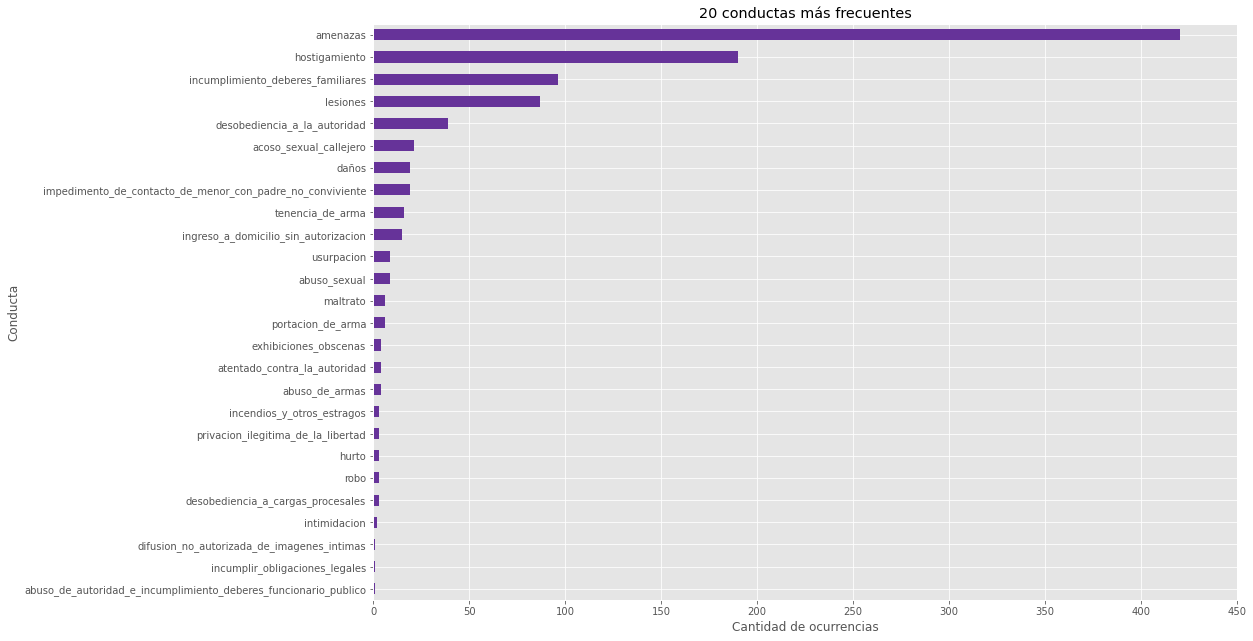

In [72]:
top_conducts = df['CONDUCTA'].value_counts(ascending=True) # shows only the 20 most frequent

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

top_conducts.plot(kind='barh', color='rebeccapurple')
ax.set_xlim([0, 450])
ax.set_xlabel('Cantidad de ocurrencias')
ax.set_ylabel('Conducta')
ax.set(title='20 conductas más frecuentes')

plt.show()

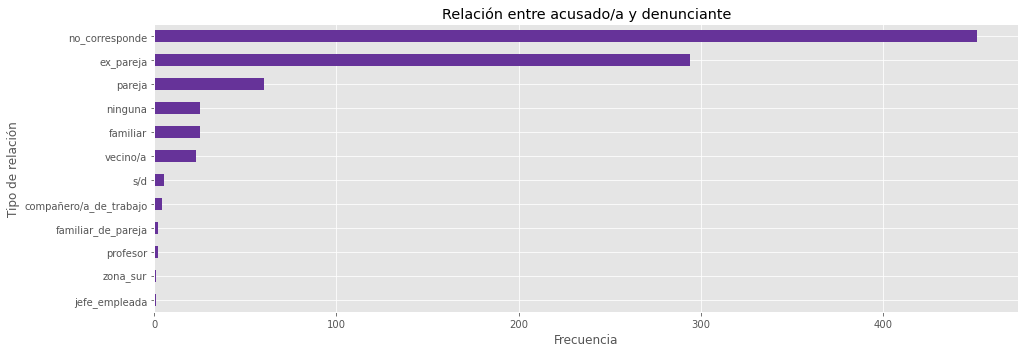

In [58]:
relationship_counts = df['RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'].value_counts(ascending=True)

fig = plt.figure()

ax = fig.add_axes([0,0,2,1])

relationship_counts.plot(kind='barh', color='rebeccapurple')

ax.set_title('Relación entre acusado/a y denunciante')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Tipo de relación')

plt.show()

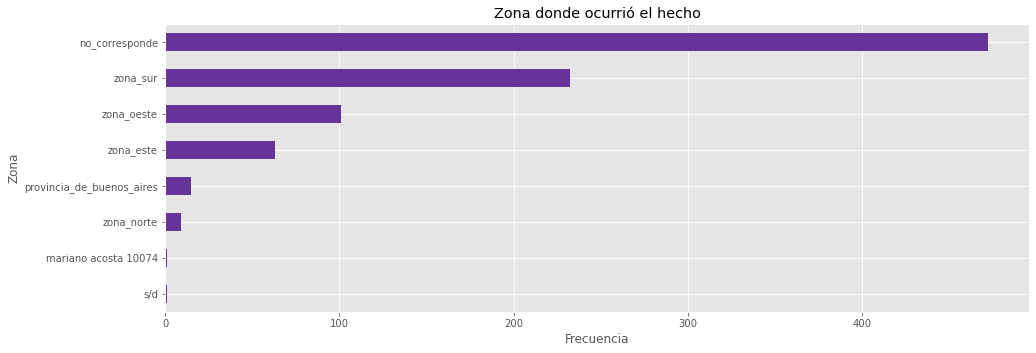

In [59]:
incident_area = df['ZONA_DEL_HECHO'].value_counts(ascending=True)

fig = plt.figure()

ax = fig.add_axes([0,0,2,1])

incident_area.plot(kind='barh', color='rebeccapurple')

ax.set_title('Zona donde ocurrió el hecho')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Zona')

plt.show()

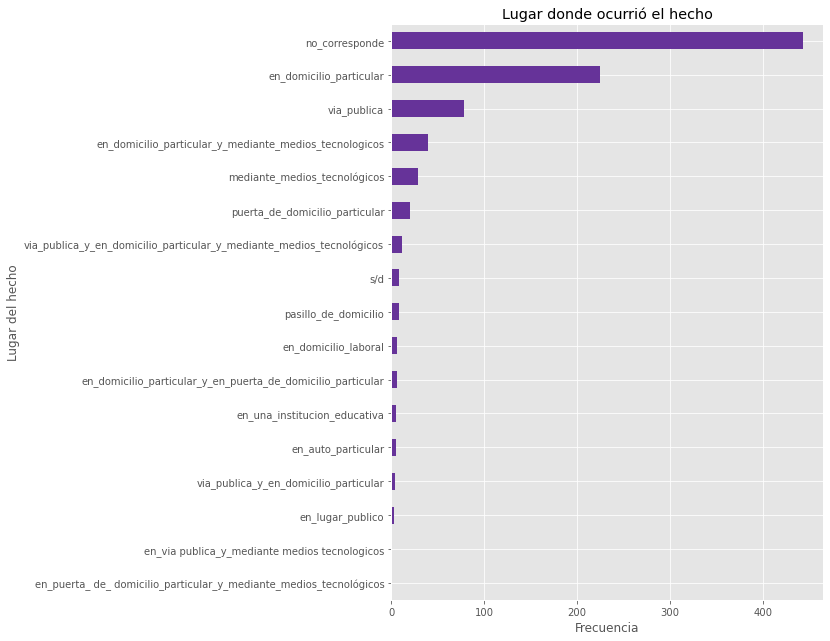

In [60]:
incident_location_type = df['LUGAR_DEL_HECHO'].value_counts(ascending=True)

fig = plt.figure()

ax = fig.add_axes([0,0,1,2])

incident_location_type.plot(kind='barh', color='rebeccapurple')

ax.set_title('Lugar donde ocurrió el hecho')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Lugar del hecho')

plt.show()

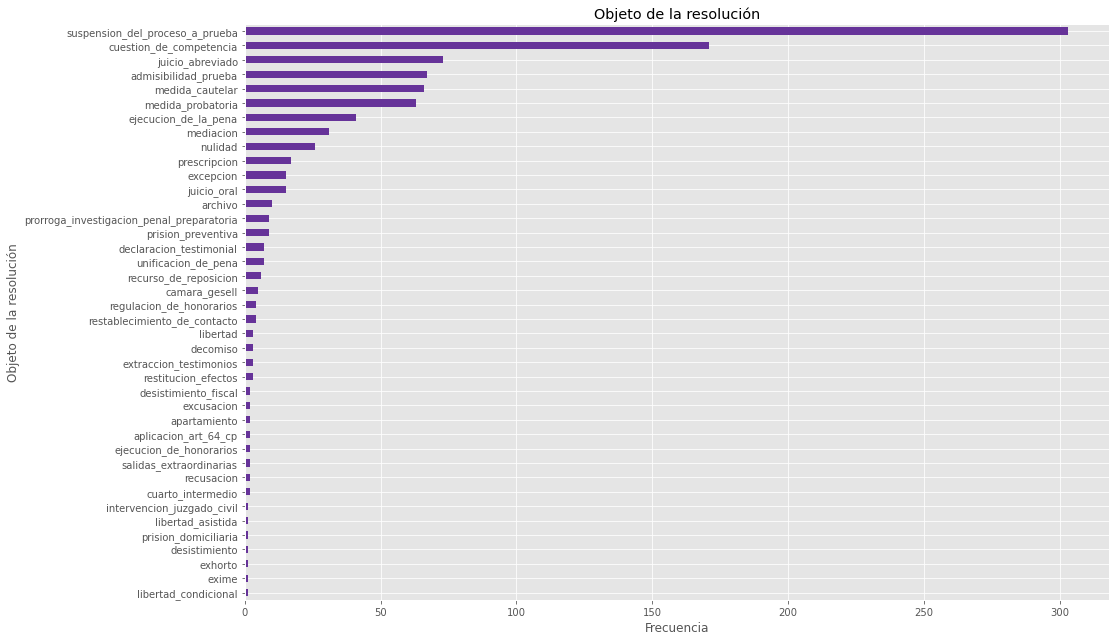

In [61]:
resolution = df['OBJETO_DE_LA_RESOLUCION'].value_counts(ascending=True)

fig = plt.figure()

ax = fig.add_axes([0,0,2,2])

resolution.plot(kind='barh', color='rebeccapurple')

ax.set_title('Objeto de la resolución')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Objeto de la resolución')

plt.show()

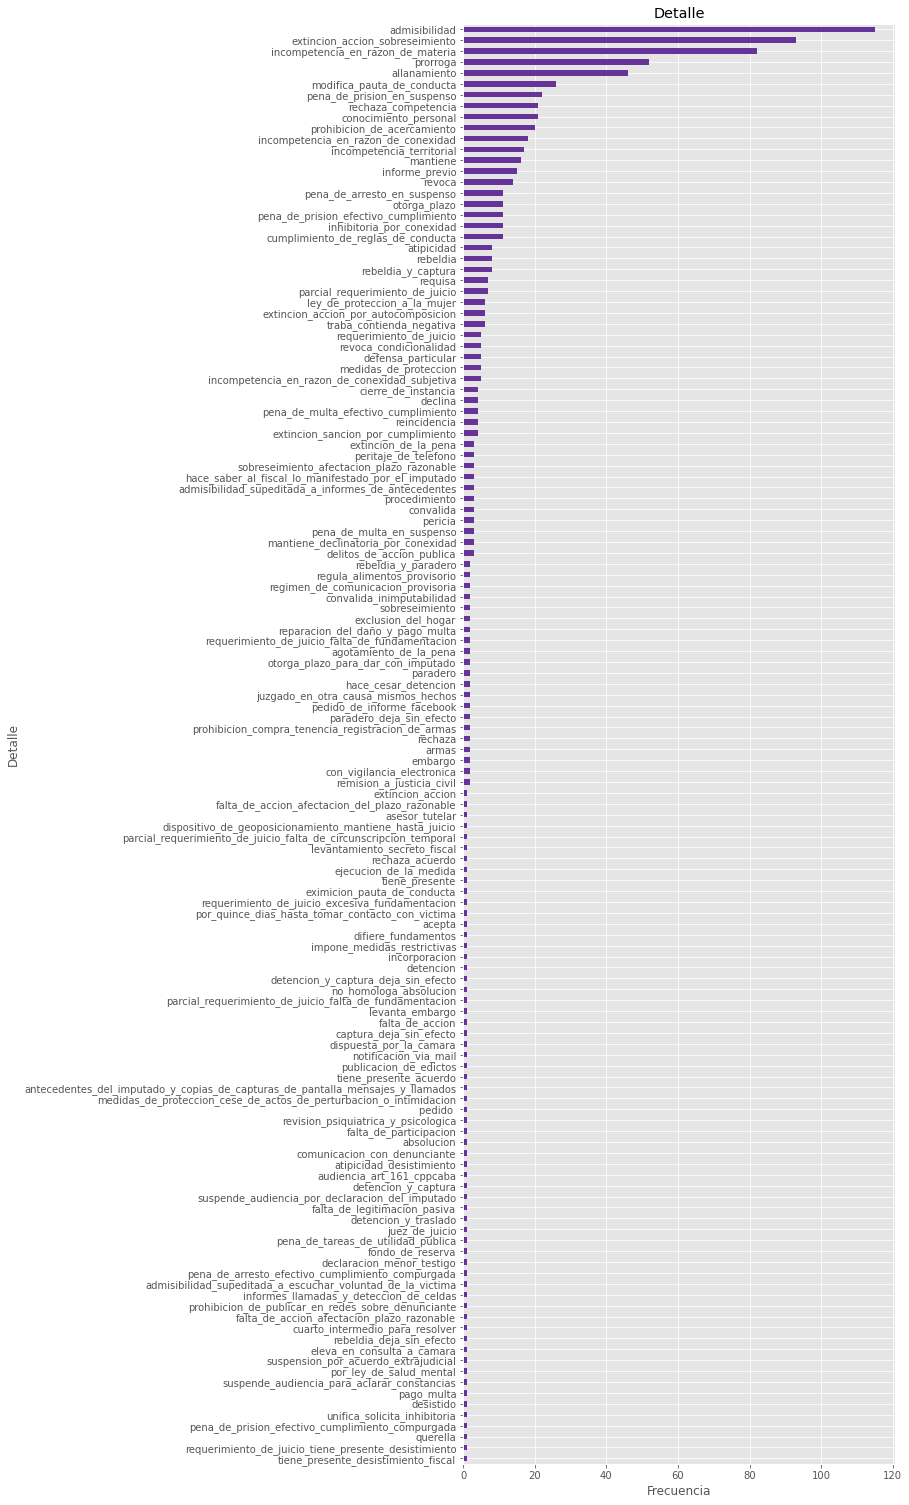

In [64]:
detail = df['DETALLE'].value_counts(ascending=True)

fig = plt.figure()

ax = fig.add_axes([0,0,1,5])

detail.plot(kind='barh', color='rebeccapurple')

ax.set_title('Detalle')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Detalle')

plt.show()

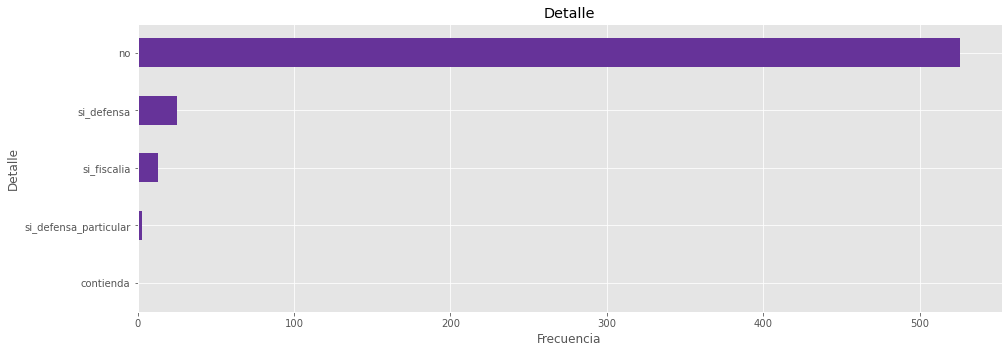

In [73]:
recurring = df['SI_NO_RECURRENTE'].value_counts(ascending=True)

fig = plt.figure()

ax = fig.add_axes([0,0,2,1])

recurring.plot(kind='barh', color='rebeccapurple')

ax.set_title('Detalle')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Detalle')

plt.show()

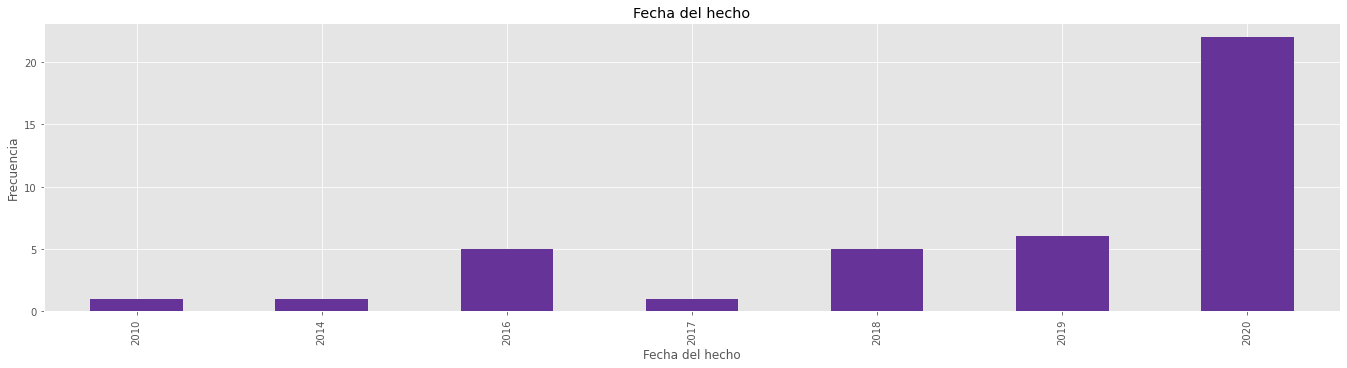

In [53]:
incident_date = df.FECHA_DEL_HECHO.dt.year.dropna().value_counts().sort_index().astype(int) # 2016, 2017, 2018, 2019
incident_years = sorted(df.FECHA_DEL_HECHO.dt.year.dropna().unique().astype(int))

fig = plt.figure()

ax = fig.add_axes([0,0,3,1])

incident_date.plot(kind='bar', color='rebeccapurple')

ax.set_title('Fecha del hecho')
ax.set_xlabel('Fecha del hecho')
ax.set_ylabel('Frecuencia')

ax.set_xticklabels(incident_years)

plt.show()

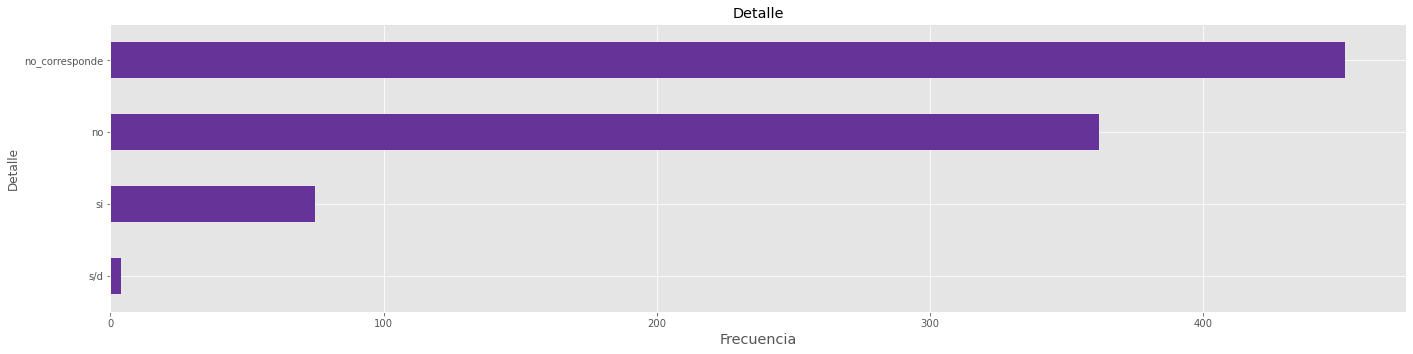

In [75]:
recurring = df['MEDIDAS_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO'].value_counts(ascending=True)

fig = plt.figure()

ax = fig.add_axes([0,0,3,1])

recurring.plot(kind='barh', color='rebeccapurple')

ax.set_title('Detalle')
ax.set_xlabel('Frecuencia', fontsize='x-large')
ax.set_ylabel('Detalle')

plt.show()